Reading and understanding the data through EDA.

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [106]:
df_bike_sharing = pd.read_csv("day.csv")
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [107]:
df_bike_sharing.shape
# (rows,columns)

(730, 16)

In [108]:
df_bike_sharing.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [109]:
# convert data type of date column as appropriate
df_bike_sharing['dteday'] = pd.to_datetime(df_bike_sharing['dteday'], format="%d-%m-%Y")

In [110]:
df_bike_sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [111]:
df_bike_sharing.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


Visualize the data

In [112]:
# find correlations between numeric variables
corr = df_bike_sharing[['weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']].corr()


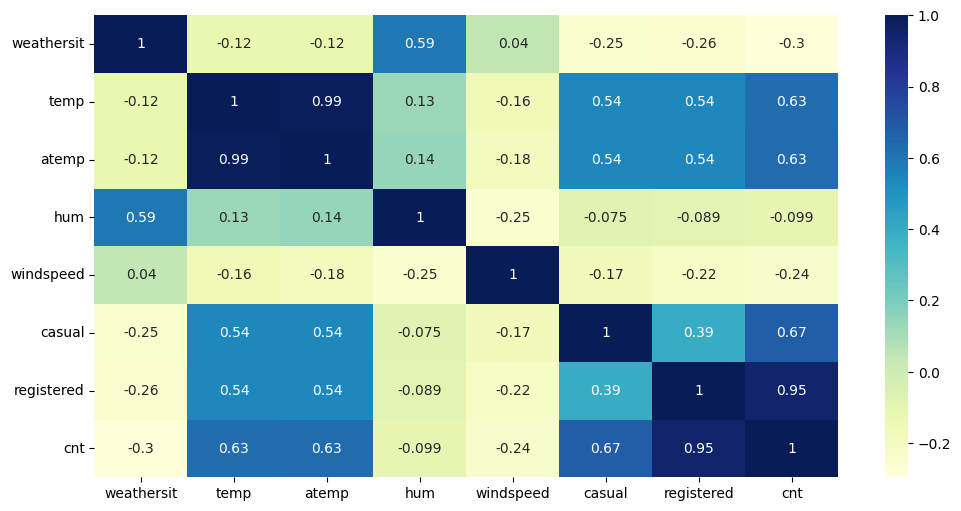

In [113]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12, 6))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()


'casual' and 'registered' can be dropped as these are constituents of the target variable 'cnt'. There is a positive correlation of 'temp', and 'atemp' with 'cnt'. However there is negative correlation with 'weathersit', 'windspeed' and 'humidity'.

There is strong positive correlation between 'temp' and 'atemp' as well. We can remove one of these.

Checking categorical variables now.

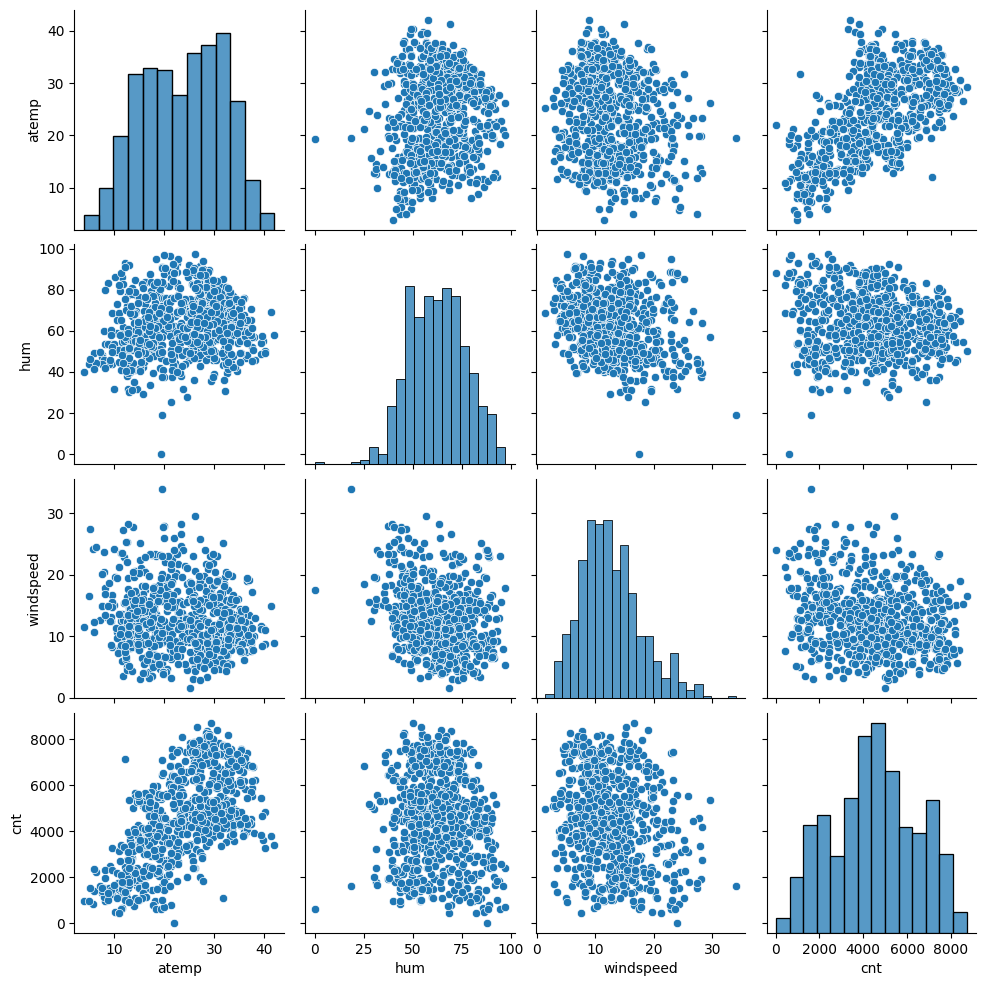

In [116]:
#Looking at the pair-plot among the numerical variables, atemp has the highest correlation with cnt.
sns.pairplot(df_bike_sharing[['atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

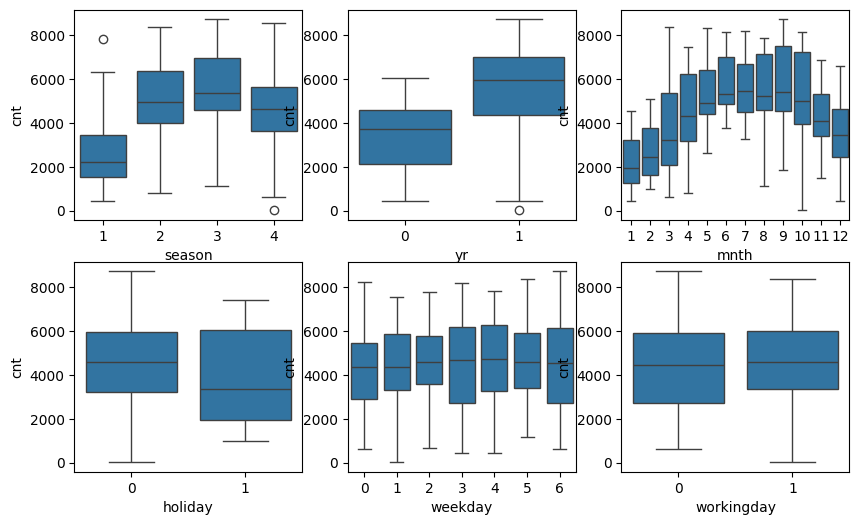

In [11]:
plt.figure(figsize=(10, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike_sharing)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike_sharing)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike_sharing)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike_sharing)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike_sharing)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike_sharing)
plt.show()

We can observe a pattern in the 'season' variable. Specifically for spring the 'cnt' is low in comparison to other seasons. Similar pattern can be seen in 'mnth'.
There is not much variation in terms of 'weekday' and 'workingday'. Almost same mid value of 'cnt' for all categories.
However, for 'holiday', there is a pattern observed. There is variation in 'yr'.

In [118]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status' .
status = pd.get_dummies(df_bike_sharing['season'], drop_first=True, dtype=int)
status.value_counts()

2  3  4
0  1  0    188
1  0  0    184
0  0  0    180
      1    178
Name: count, dtype: int64

In [119]:
# Add the results to the original housing dataframe

df_bike_sharing = pd.concat([df_bike_sharing, status], axis = 1)

In [120]:
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,2,3,4
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [121]:
# rename columns
df_bike_sharing.rename(columns = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace = True)

In [122]:
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [123]:
# convert weekday values into 1s and 0s
# use mapping {1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}
df_bike_sharing['weekday'] = df_bike_sharing['weekday'].map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,summer,fall,winter
0,1,2018-01-01,1,0,1,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
1,2,2018-01-02,1,0,1,0,Tues,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
2,3,2018-01-03,1,0,1,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
3,4,2018-01-04,1,0,1,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
4,5,2018-01-05,1,0,1,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [124]:
#convert into 1s and 0s using dummy
status_weekday = pd.get_dummies(df_bike_sharing['weekday'], drop_first=True, dtype=int)
df_bike_sharing = pd.concat([df_bike_sharing, status_weekday], axis = 1)
# rename columns
df_bike_sharing.rename(columns ={1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'}, inplace = True)

df_bike_sharing


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,cnt,summer,fall,winter,Mon,Sat,Sun,Thurs,Tues,Wed
0,1,2018-01-01,1,0,1,0,Mon,0,2,14.110847,...,985,0,0,0,1,0,0,0,0,0
1,2,2018-01-02,1,0,1,0,Tues,0,2,14.902598,...,801,0,0,0,0,0,0,0,1,0
2,3,2018-01-03,1,0,1,0,Wed,1,1,8.050924,...,1349,0,0,0,0,0,0,0,0,1
3,4,2018-01-04,1,0,1,0,Thurs,1,1,8.200000,...,1562,0,0,0,0,0,0,1,0,0
4,5,2018-01-05,1,0,1,0,Fri,1,1,9.305237,...,1600,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,1,12,0,Sat,1,2,10.420847,...,2114,0,0,0,0,1,0,0,0,0
726,727,2019-12-28,1,1,12,0,Sun,1,2,10.386653,...,3095,0,0,0,0,0,1,0,0,0
727,728,2019-12-29,1,1,12,0,Mon,0,2,10.386653,...,1341,0,0,0,1,0,0,0,0,0
728,729,2019-12-30,1,1,12,0,Tues,0,1,10.489153,...,1796,0,0,0,0,0,0,0,1,0


In [125]:
#do the same for month
status_month = pd.get_dummies(df_bike_sharing['mnth'], drop_first=True, dtype=int)
df_bike_sharing = pd.concat([df_bike_sharing, status_month], axis = 1)
#rename 1, 2 into month names
df_bike_sharing.rename(columns = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace = True)



In [126]:

df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,2018-01-01,1,0,1,0,Mon,0,2,14.110847,...,0,0,0,0,0,0,0,0,0,0
1,2,2018-01-02,1,0,1,0,Tues,0,2,14.902598,...,0,0,0,0,0,0,0,0,0,0
2,3,2018-01-03,1,0,1,0,Wed,1,1,8.050924,...,0,0,0,0,0,0,0,0,0,0
3,4,2018-01-04,1,0,1,0,Thurs,1,1,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,2018-01-05,1,0,1,0,Fri,1,1,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df_bike_sharing['weathersit'].value_counts()

,count
weathersit,
1,463
2,246
3,21


# weathersit is categorical variable and it can be seen there is a pattern when we plot a  boxplot. We can convert the data into numeric using dummy method and use in our analysis


<Axes: xlabel='weathersit', ylabel='cnt'>

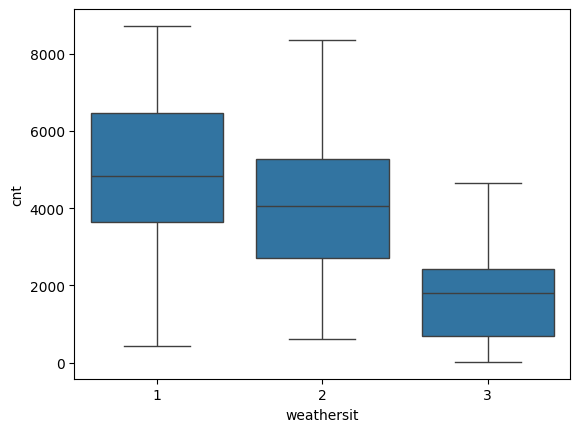

In [22]:

sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike_sharing)

In [128]:
status_weather = pd.get_dummies(df_bike_sharing['weathersit'], drop_first=True, dtype=int)
status_weather.rename(columns = {1: 'Clear', 2: 'Mist', 3: 'Light', 4: 'Heavy'}, inplace = True)
df_bike_sharing = pd.concat([df_bike_sharing, status_weather], axis = 1)
df_bike_sharing.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mist,Light
0,1,2018-01-01,1,0,1,0,Mon,0,2,14.110847,...,0,0,0,0,0,0,0,0,1,0
1,2,2018-01-02,1,0,1,0,Tues,0,2,14.902598,...,0,0,0,0,0,0,0,0,1,0
2,3,2018-01-03,1,0,1,0,Wed,1,1,8.050924,...,0,0,0,0,0,0,0,0,0,0
3,4,2018-01-04,1,0,1,0,Thurs,1,1,8.200000,...,0,0,0,0,0,0,0,0,0,0
4,5,2018-01-05,1,0,1,0,Fri,1,1,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# dropping original categorical columns as we already transformed.

df_bike_sharing.drop('season', axis = 1, inplace = True)
df_bike_sharing.drop(['dteday','instant'], axis = 1, inplace = True)
df_bike_sharing.drop('weekday', axis = 1, inplace = True)
df_bike_sharing.drop('mnth', axis = 1, inplace = True)
df_bike_sharing.drop('weathersit', axis = 1, inplace = True)

#remove the registered and casual fields as these will not be required for model building

df_bike_sharing.drop(['registered', 'casual'], axis = 1, inplace = True)

In [130]:
# we saw temp and atemp have high correlation so we remove one.

df_bike_sharing.drop(['temp'], axis = 1, inplace = True)

In [131]:
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   summer      730 non-null    int64  
 8   fall        730 non-null    int64  
 9   winter      730 non-null    int64  
 10  Mon         730 non-null    int64  
 11  Sat         730 non-null    int64  
 12  Sun         730 non-null    int64  
 13  Thurs       730 non-null    int64  
 14  Tues        730 non-null    int64  
 15  Wed         730 non-null    int64  
 16  Feb         730 non-null    int64  
 17  Mar         730 non-null    int64  
 18  Apr         730 non-null    int64  
 19  May         730 non-null    i

## Splitting the Data into Training and Testing Sets and rescale.



In [132]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bike_sharing, train_size = 0.8, test_size = 0.2, random_state = 42)

In [133]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [134]:
df_train[['atemp', 'hum', 'windspeed', 'cnt']] = scaler.fit_transform(df_train[['atemp', 'hum', 'windspeed', 'cnt']])

In [135]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mist,Light
247,0,1,0,0.717455,0.814513,0.475900,0.382996,0,1,0,...,0,0,0,0,1,0,0,0,1,0
335,0,0,1,0.331261,0.644911,0.195963,0.450759,0,0,1,...,0,0,0,0,0,0,0,1,0,0
702,1,0,1,0.511907,0.756118,0.379454,0.757478,0,0,1,...,0,0,0,0,0,0,0,1,0,0
440,1,0,0,0.559152,0.778874,0.220845,0.898988,0,0,0,...,0,0,0,0,0,0,0,0,1,0
136,0,0,1,0.603102,0.863461,0.637592,0.471813,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [136]:
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mist,Light
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.511986,0.032534,0.672945,0.527193,0.654151,0.410017,0.520520,0.250000,0.265411,0.255137,...,0.089041,0.085616,0.092466,0.077055,0.085616,0.095890,0.089041,0.075342,0.344178,0.032534
std,0.500285,0.177566,0.469540,0.212483,0.146644,0.187249,0.224926,0.433384,0.441930,0.436312,...,0.285047,0.280037,0.289931,0.266907,0.280037,0.294693,0.285047,0.264169,0.475507,0.177566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353829,0.542745,0.276424,0.371088,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.558730,0.657578,0.379465,0.523527,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.698392,0.757346,0.520978,0.691872,0.250000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


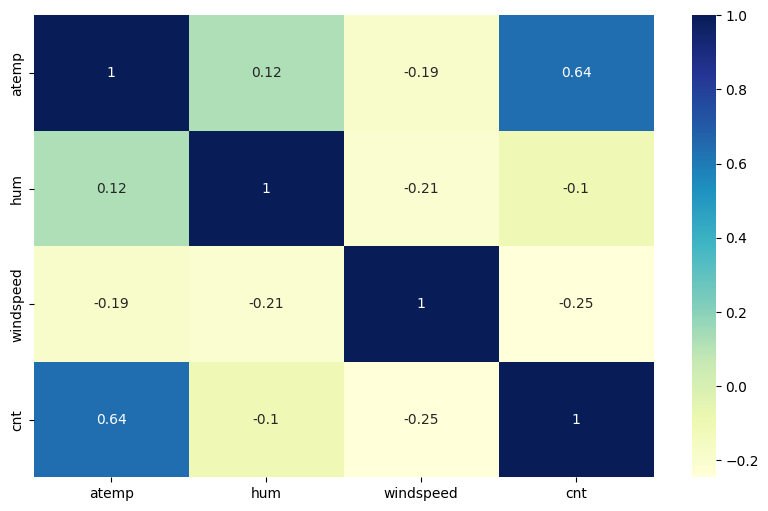

In [137]:
# checking correlations once again.
corr = df_train[[ 'atemp',
       'hum', 'windspeed', 'cnt', ]].corr()

plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.show()

In [138]:
y_train = df_train.pop('cnt')
X_train = df_train

## RFE

In [139]:
import statsmodels.api as sm
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step = 25)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [140]:
# Check the parameters obtained

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Mon', False, 2),
 ('Sat', False, 2),
 ('Sun', False, 2),
 ('Thurs', False, 2),
 ('Tues', False, 2),
 ('Wed', False, 2),
 ('Feb', False, 2),
 ('Mar', True, 1),
 ('Apr', False, 2),
 ('May', True, 1),
 ('Jun', False, 2),
 ('Jul', False, 2),
 ('Aug', False, 2),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', True, 1),
 ('Dec', False, 2),
 ('Mist', True, 1),
 ('Light', True, 1)]

In [141]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'atemp', 'hum', 'windspeed', 'summer', 'fall', 'winter', 'Mar',
       'May', 'Sep', 'Oct', 'Nov', 'Mist', 'Light'],
      dtype='object')

In [142]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed',
       'Feb', 'Apr', 'Jun', 'Jul', 'Aug', 'Dec'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [143]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [144]:
# Adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [145]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [146]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     200.6
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.28e-209
Time:                        04:26:04   Log-Likelihood:                 563.23
No. Observations:                 584   AIC:                            -1096.
Df Residuals:                     569   BIC:                            -1031.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2247      0.028      8.006      0.0

In [147]:
#Nov is insignificant in presence of other variables. removing.
X_train_new = X_train_rfe.drop(["Nov"], axis = 1)

In [148]:
# rebuilding the model
# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)

In [150]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [151]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          2.71e-210
Time:                        04:26:26   Log-Likelihood:                 562.64
No. Observations:                 584   AIC:                            -1097.
Df Residuals:                     570   BIC:                            -1036.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.028      7.962      0.0

In [152]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.53
6,fall,5.56
2,atemp,3.75
5,summer,3.18
7,winter,2.48
3,hum,1.95
12,Mist,1.60
11,Oct,1.58
9,May,1.53
13,Light,1.34


In [153]:
X_train_new = X_train_new.drop(['fall'], axis=1)

In [154]:
# Calculate the VIFs again for the new model after removing fall as VIF is very high
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,52.07
3,hum,1.94
6,winter,1.75
5,summer,1.66
11,Mist,1.59
10,Oct,1.53
8,May,1.50
12,Light,1.33
2,atemp,1.31
4,windspeed,1.19


In [155]:
# rebuilding the model
# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     221.7
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          7.93e-206
Time:                        04:26:50   Log-Likelihood:                 549.26
No. Observations:                 584   AIC:                            -1073.
Df Residuals:                     571   BIC:                            -1016.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2095      0.029      7.345      0.0

In [156]:
# May has high p-value. removing it.
X_train_new = X_train_new.drop(['May'], axis=1)

In [157]:
X_train_new.columns

Index(['const', 'yr', 'atemp', 'hum', 'windspeed', 'summer', 'winter', 'Mar',
       'Sep', 'Oct', 'Mist', 'Light'],
      dtype='object')

In [159]:
# rebuilding the model to see if AIC, BIC improved or not as we have removed lot of columns, and also check adjusted R2 and p-values
# Adding a constant variable
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     241.4
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.11e-206
Time:                        04:27:04   Log-Likelihood:                 548.43
No. Observations:                 584   AIC:                            -1073.
Df Residuals:                     572   BIC:                            -1020.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2058      0.028      7.249      0.0

Text(0.5, 0, 'Errors')

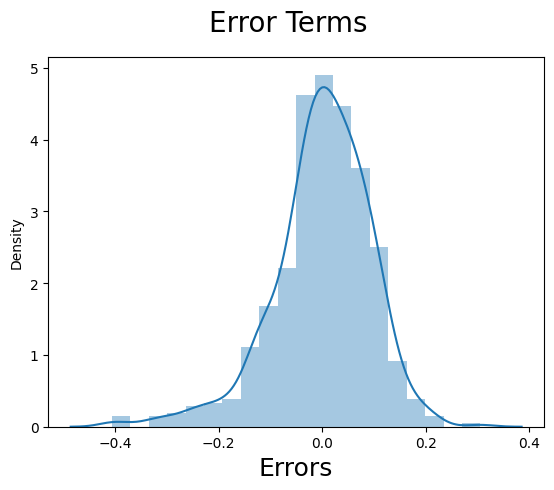

In [160]:
y_train_price = lm.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Applying the scaling on the test sets

In [161]:
df_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mist,Light
468,1,0,0,24.39980,50.2917,12.791439,7460,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148,0,0,0,30.77750,81.8750,14.333846,4788,1,0,0,...,1,0,0,0,0,0,0,0,0,0
302,0,0,0,16.06645,62.3750,11.833339,3331,0,0,1,...,0,0,0,0,0,1,0,0,0,0
355,0,0,1,21.30605,75.7500,3.167425,3068,0,0,0,...,0,0,0,0,0,0,0,1,1,0
515,1,0,1,31.56645,49.2917,13.083693,7338,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [162]:
df_test[['atemp', 'hum', 'windspeed', 'cnt']] = scaler.transform(df_test[['atemp', 'hum', 'windspeed', 'cnt']])

In [163]:
y_test = df_test.pop('cnt')
X_test = df_test

In [164]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)
X_test_m4.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,summer,fall,winter,...,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mist,Light
468,1.0,1,0,0,0.536771,0.518248,0.421436,1,0,0,...,0,0,0,0,0,0,0,0,0,0
148,1.0,0,0,0,0.704203,0.843709,0.479005,1,0,0,...,1,0,0,0,0,0,0,0,0,0
302,1.0,0,0,0,0.317998,0.642765,0.385676,0,0,1,...,0,0,0,0,0,1,0,0,0,0
355,1.0,0,0,1,0.455552,0.780592,0.062226,0,0,0,...,0,0,0,0,0,0,0,1,1,0
515,1.0,1,0,1,0.724915,0.507943,0.432344,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [165]:
#Drop the insignificant columns: May, Nov, fall, etc.
X_test_m4 = X_test_m4.drop(["May", "Nov", "fall"], axis = 1)

In [166]:
X_test_m4 = X_test_m4.drop(['holiday', 'workingday','Mon', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Feb', 'Apr', 'Jun', 'Jul', 'Aug', 'Dec'], axis = 1)

In [167]:
# Making predictions using the optimized model

y_pred_m4 = lm.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

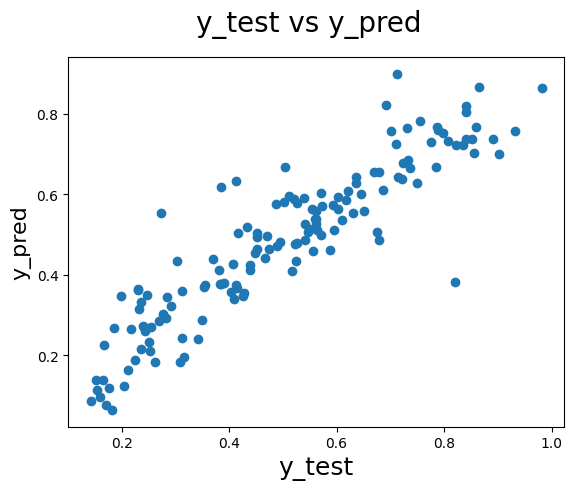

In [168]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [170]:
from sklearn.metrics import r2_score

# convert to percent
print ('Model accuracy: ' + str(round((r2_score(y_test, y_pred_m4)*100),2)) + '%')

Model accuracy: 82.06%
